# Support Vector Machine 

Support Vector Machine (SVM) is a supervised machine learning algorithm which can be used for both classification or regression challenges. However,  it is mostly used in classification problems. Support Vectors are simply the co-ordinates of individual observation. Support Vector Machine is a frontier which best segregates the two classes. 

The objective of the support vector machine algorithm is to find a hyperplane in an N-dimensional space(N — the number of features) that distinctly classifies the data points.

**Here i am using the "iris" dataset which is available in the sklearn dataset librery.**

In [0]:
from sklearn import datasets		# To Get iris dataset
from sklearn import svm    			# To fit the svm classifier
import numpy as np              # To create and maipulate the numpy array.
import matplotlib.pyplot as plt # To visuvalizing the data

In [0]:
# import iris data to numpy array
iris_dataset = datasets.load_iris()

The Iris flower data set or Fisher's Iris data set is a multivariate data set . The dataset contains a set of 150 records under five attributes - petal length, petal width, sepal length, sepal width and species.The data set consists of 50 samples from each of three species of Iris (Iris Setosa, Iris virginica, and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters.

The dataset consisits of 4 features.
sepal length
sepal width
petal length
petal width

**Here we will create SVM models for sepal length & width **

In [0]:
print("Iris data set Description :: ", iris_dataset['DESCR']) # To get the detailed descriptive analysis of the dataset.

Iris data set Description ::  .. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== 

In [0]:
# print the integers representing the species of each observation
print ("Iris target :: ", iris_dataset['target']) 

Iris target ::  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [0]:
# print the encoding scheme for species; 0 = Setosa , 1=Versicolor, 2= virginica
print (iris_dataset.target_names)

['setosa' 'versicolor' 'virginica']


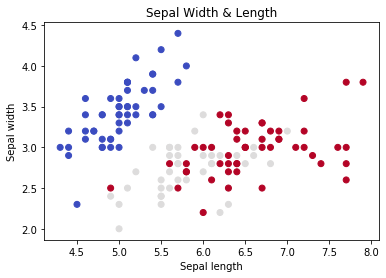

In [0]:
# Plotting the Scatter plot : Sepal Width & Length using matplotlib.pyplot and visuvalize_sepal_data() function.

def visuvalize_sepal_data():
	iris = datasets.load_iris()
	X = iris.data[:, :2]  			# we only take the first two features for setting it as x and y axis.
	y = iris.target  						# setting target as y variable.
	plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm) # plot the scattor for target variable ( 3 claases of species) by
																													 # setting sepal width and lenght as y and x axis.
	plt.xlabel('Sepal length')
	plt.ylabel('Sepal width')
	plt.title('Sepal Width & Length')
	plt.show()

visuvalize_sepal_data()

In [0]:
# Declaring and fitting the SVC model beteen sepel length and sepel width.

X = iris_dataset.data[:, :2]  # we only take the Sepal first two features.
y = iris_dataset.target
C = 1.0                       # SVM regularization parameter

# ignoring the waring................................................
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# SVC with linear kernel
svc = svm.SVC(kernel='linear', C=C).fit(X, y)

# SVC with polynomial (degree 3) kernel
poly_svc = svm.SVC(kernel='poly', degree=3, C=C).fit(X, y)

**The Regularization parameter** (termed as C parameter in python’s sklearn library) tells the SVM optimization how much you want to avoid misclassifying each training example.
For large values of C, the optimization will choose a smaller-margin hyperplane. A very small value of C will cause the optimizer to look for a larger-margin separating hyperplane.

**The linear kernel** can be used as normal dot product any two given observations. The dot product between the input (x) and each support vector (xi) is calculated as follows:
f(x) = B(0) + sum(ai * (x,xi))
B(0) and ai are the co-efficient, and the algorithm will calculate it from training data.

**Polynomial kernels** calculates separation line in higher dimension. A polynomial kernel is a more generalized form of the linear kernel. The polynomial kernel can distinguish curved or nonlinear input space.

The polynomial kernel can be written as: K(x,xi) = 1 + sum(x * xi)^d.



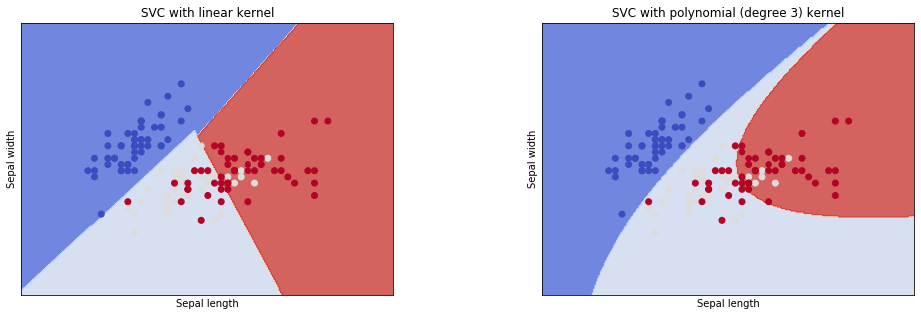

In [0]:
# ploting the SVC model for sepel width and lenght.

h = .02  # step size in the mesh

# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
	                     np.arange(y_min, y_max, h))

plt.figure(figsize=(16, 12))
# title for the plots
titles = ['SVC with linear kernel',
	    'SVC with polynomial (degree 3) kernel']


for i, clf in enumerate((svc, poly_svc)):
	 # Plot the decision boundary. For that, we will assign a color to each
	 # point in the mesh [x_min, x_max]x[y_min, y_max].
	 plt.subplot(2, 2, i + 1)
	 plt.subplots_adjust(wspace=0.4, hspace=0.4)

	 Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

	 # Put the result into a color plot
	 Z = Z.reshape(xx.shape)
	 plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

	 # Plot also the training points
	 plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
	 plt.xlabel('Sepal length')
	 plt.ylabel('Sepal width')
	 plt.xlim(xx.min(), xx.max())
	 plt.ylim(yy.min(), yy.max())
	 plt.xticks(())
	 plt.yticks(())
	 plt.title(titles[i])

plt.show()